<a href="https://colab.research.google.com/github/ravichas/AMPL-Tutorial/blob/master/AMPL_EDA_Part2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Part two: visualizing results of hyperparameter search and predictions from best models

This notebook runs through the same setup as EDA Part 2 but examines classification models instead of regression models. There are some new visualizations for your use.

# Install AMPL packages

In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
! wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
! chmod +x Anaconda3-2019.10-Linux-x86_64.sh
! bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local

# ! wget -c https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh 
# ! chmod +x Miniconda3-py37_4.9.2-Linux-x86_64.sh
# ! time bash Miniconda3-py37_4.9.2-Linux-x86_64.sh -b -f -p /usr/local

! time conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-04-15 15:31:24--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 530308481 (506M) [application/x-sh]
Saving to: ‘Anaconda3-2019.10-Linux-x86_64.sh’

Anaconda3-2019.10-L 100%[===================>] 505.74M   160MB/s    in 3.2s    

2021-04-15 15:31:27 (158 MB/s) - ‘Anaconda3-2019.10-Linux-x86_64.sh’ saved [530308481/530308481]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0


In [4]:
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh

--2021-04-15 15:39:35--  https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU_test.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1100 (1.1K) [text/plain]
Saving to: ‘install_AMPL_GPU_test.sh’

install_AMPL_GPU_te 100%[===================>]   1.07K  --.-KB/s    in 0s      

2021-04-15 15:39:35 (38.3 MB/s) - ‘install_AMPL_GPU_test.sh’ saved [1100/1100]



In [5]:
! chmod u+x install_AMPL_GPU_test.sh
! time ./install_AMPL_GPU_test.sh

Cloning into 'AMPL'...
remote: Enumerating objects: 2002, done.
remote: Counting objects: 100% (494/494), done.
remote: Compressing objects: 100% (270/270), done.
remote: Total 2002 (delta 347), reused 332 (delta 223), pack-reused 1508
Receiving objects: 100% (2002/2002), 9.73 MiB | 8.10 MiB/s, done.
Resolving deltas: 100% (1159/1159), done.
Branch 'pkg_upgrade' set up to track remote branch 'pkg_upgrade' from 'origin'.
Switched to a new branch 'pkg_upgrade'
patching file /content/github/AMPL/atomsci/ddm/pipeline/transformations.py
patching file /content/github/AMPL/atomsci/ddm/__init__.py
running build
running build_py
creating /content/github/AMPL.build/ampl/lib
creating /content/github/AMPL.build/ampl/lib/atomsci
copying atomsci/__init__.py -> /content/github/AMPL.build/ampl/lib/atomsci
creating /content/github/AMPL.build/ampl/lib/atomsci/ddm
copying atomsci/ddm/__init__.py -> /content/github/AMPL.build/ampl/lib/atomsci/ddm
creating /content/github/AMPL.build/ampl/lib/atomsci/ddm/ut

In [6]:
! time pip install mordred bravado molvs

     |████████████████████████████████| 133kB 12.7MB/s 
     |████████████████████████████████| 71kB 21.1MB/s 
     |████████████████████████████████| 71kB 23.3MB/s 
     |████████████████████████████████| 133kB 45.5MB/s 
  Created wheel for mordred: filename=mordred-1.2.0-cp37-none-any.whl size=176721 sha256=04a59c8a9d53bfabf72ae26ed4943fab37d1d8edff5e4c6f79b22bf79cc2399d
  Stored in directory: /root/.cache/pip/wheels/ac/74/3f/2fd81b1187013f2eadb15620434813f1824c4c03b7bd1f94f6
  Created wheel for molvs: filename=MolVS-0.1.1-cp37-none-any.whl size=32376 sha256=2a145be5b0afd12361a81e9e2daf318a6e17d547003e10fa3b9a7a59a231427a
  Stored in directory: /root/.cache/pip/wheels/30/37/a8/8ac8147605c9de6b45ffd66d1cc19761d41467db12b34a0de8
  Created wheel for strict-rfc3339: filename=strict_rfc3339-0.7-cp37-none-any.whl size=18120 sha256=dc1bd4927e2b4e8e21b368e76f1579a3c4475866b10d85d7e2830a9e80a4c088
  Stored in directory: /root/.cache/pip/wheels/bb/af/c9/b6e9fb5f9b2470e4ed2a7241c9ab3a8cdd3bc855

In [7]:
!wget https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/datasets/H1_std.csv

--2021-04-15 15:39:48--  https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/datasets/H1_std.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136759 (134K) [text/plain]
Saving to: ‘H1_std.csv’

H1_std.csv          100%[===================>] 133.55K  --.-KB/s    in 0.009s  

2021-04-15 15:39:48 (15.0 MB/s) - ‘H1_std.csv’ saved [136759/136759]



In [8]:
!pip install hyperopt

     |████████████████████████████████| 972kB 11.6MB/s 


In [9]:
! pip install llvmlite==0.36.0 --ignore-installed

     |████████████████████████████████| 25.3MB 44.1MB/s 


In [10]:
! pip install umap-learn==0.4.6

     |████████████████████████████████| 71kB 11.1MB/s 
     |████████████████████████████████| 2.2MB 10.5MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.4.6-cp37-none-any.whl size=67951 sha256=83bd8f03bfe79c82b81bd96f59fc7938ab4643a3e88efa98d9e89f46fe617a1d
  Stored in directory: /root/.cache/pip/wheels/7d/1d/03/34aade9a9b97acddb8e93654eb856dadbf0964406eef8b96e2
  Created wheel for numba: filename=numba-0.53.1-cp37-cp37m-linux_x86_64.whl size=2972440 sha256=922e4306f04eb15a5eb84f1b912a14f71a9b1a9e3737ccd256cd8c20e48d533d
  Stored in directory: /root/.cache/pip/wheels/18/73/6d/5efc968ed5dd12af56af988a03d81f84cc32dacefca2b1572f
Successfully built umap-learn numba
ERROR: lucid 0.3.10 requires cachetools, which is not installed.
ERROR: lucid 0.3.10 requires pyopengl, which is not installed.
  Found existing installation: numba 0.45.1
    Uninstalling numba-0.45.1:
      Successfully uninstalled numba-0.45.1


# Load packages and dataset

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_context("poster")
sns.set_style("whitegrid")
sns.set_palette("Set2")
pal = sns.color_palette()

import pandas as pd
import os, json, sys, glob, pickle

from atomsci.ddm.pipeline import model_pipeline as mp
from atomsci.ddm.pipeline import parameter_parser as parse
from atomsci.ddm.pipeline import perf_data
from atomsci.ddm.pipeline import compare_models as cmp

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [12]:
! conda clean -a -y

Cache location: /usr/local/pkgs
Will remove the following tarballs:

/usr/local/pkgs
---------------
tensorflow-base-1.14.0-gpu_py37he45bfe2_0.conda   146.3 MB
distributed-2.5.2-py_0.tar.bz2               396 KB
entrypoints-0.3-py37_0.conda                  12 KB
python-dateutil-2.8.0-py37_0.conda           266 KB
pcre-8.43-he6710b0_0.conda                   209 KB
isort-4.3.21-py37_0.conda                     69 KB
libuuid-1.0.3-h1bed415_2.conda                15 KB
ptyprocess-0.6.0-py37_0.conda                 23 KB
tblib-1.4.0-py_0.tar.bz2                      14 KB
backports.tempfile-1.0-py_1.tar.bz2           12 KB
icu-58.2-h9c2bf20_1.conda                   10.3 MB
anaconda-2019.10-py37_0.tar.bz2               11 KB
_tflow_select-2.1.0-gpu.conda                  2 KB
testpath-0.4.2-py37_0.conda                   86 KB
zipp-0.6.0-py_0.tar.bz2                        9 KB
pylint-2.4.2-py37_0.tar.bz2                  429 KB
sphinxcontrib-serializinghtml-1.1.3-py_0.tar.bz2      24 KB


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
h1 = pd.read_csv("/content/drive/MyDrive/Columbia_E4511/HTR3A_curated.csv", index_col=0)

In [15]:
h1=h1[~h1.VALUE_NUM_mean.isna()]
h1=h1[h1.VALUE_NUM_mean>2]

989 534


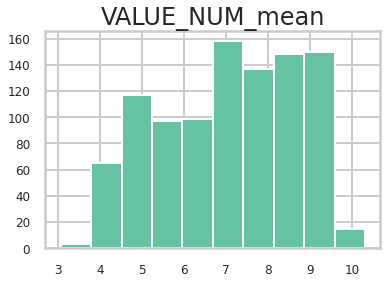

In [16]:
print(len(h1), h1.active.sum())
h1.hist('VALUE_NUM_mean');

# Edit some AMPL functions to include xgboost parameters
Just run this code once

In [17]:
nan = np.float32('nan')
def get_summary_perf_tables(collection_names=None, filter_dict={}, result_dir=None, prediction_type='regression', verbose=False):
    """
    Load model parameters and performance metrics from model tracker for all models saved in the model tracker DB under
    the given collection names (or result directory if Model tracker is not available) with the given prediction type. Tabulate the parameters and metrics including:
        dataset (assay name, target, parameter, key, bucket)
        dataset size (train/valid/test/total)
        number of training folds
        model type (NN or RF)
        featurizer
        transformation type
        metrics: r2_score, mae_score and rms_score for regression, or ROC AUC for classification

    result_dir: use result_dir when the model tracker is not available. Use a list format if you have multiple result direcotries.
    """
    collection_list = []
    model_uuid_list = []
    time_built_list = []
    prediction_type_list = []
    model_type_list = []
    dataset_key_list = []
    bucket_list = []
    param_list = []
    featurizer_list = []
    desc_type_list = []
    transform_list = []
    dset_size_list = []
    splitter_list = []
    split_strategy_list = []
    split_uuid_list = []
    rf_estimators_list = []
    rf_max_features_list = []
    rf_max_depth_list = []
    best_epoch_list = []
    max_epochs_list = []
    learning_rate_list = []
    layer_sizes_list = []
    dropouts_list = []
    xgb_gamma_list = []
    xgb_learning_rate_list = []
    umap_dim_list = []
    umap_targ_wt_list = []
    umap_neighbors_list = []
    umap_min_dist_list = []
    split_uuid_list=[]


    if prediction_type == 'regression':
        score_types = ['r2_score', 'mae_score', 'rms_score']
    else:
        # TODO: add more classification metrics later
        score_types = ['roc_auc_score', 'prc_auc_score', 'accuracy_score', 'precision', 'recall_score', 'npv', 'matthews_cc', 'kappa','cross_entropy']

    subsets = ['train', 'valid', 'test']
    score_dict = {}
    ncmpd_dict = {}
    for subset in subsets:
        score_dict[subset] = {}
        for score_type in score_types:
            score_dict[subset][score_type] = []
        ncmpd_dict[subset] = []

    metadata_list_dict = {}
    if result_dir:
        if isinstance(result_dir, str):
            result_dir = [result_dir]
        for rd in result_dir:
            if rd not in metadata_list_dict:
                metadata_list_dict[rd] = []
            for dirpath, dirnames, filenames in os.walk(rd):
                if "model_metadata.json" in filenames:
                    with open(os.path.join(dirpath, 'model_metadata.json')) as f:
                        metadata_dict = json.load(f)
                    metadata_list_dict[rd].append(metadata_dict)

    for ss in metadata_list_dict:
        for i, metadata_dict in enumerate(metadata_list_dict[ss]):
            if (i % 10 == 0) and verbose:
                print('Processing collection %s model %d' % (ss, i))
            # Check that model has metrics before we go on
            if not 'training_metrics' in metadata_dict:
                continue
            collection_list.append(ss)
            model_uuid = metadata_dict['model_uuid']
            model_uuid_list.append(model_uuid)
            time_built = metadata_dict['time_built']
            time_built_list.append(time_built)

            model_params = metadata_dict['model_parameters']
            model_type = model_params['model_type']
            model_type_list.append(model_type)
            prediction_type_list.append(model_params['prediction_type'])
            featurizer = model_params['featurizer']
            featurizer_list.append(featurizer)
            if 'descriptor_specific' in metadata_dict:
                desc_type = metadata_dict['descriptor_specific']['descriptor_type']
            elif featurizer in ['graphconv', 'ecfp']:
                desc_type = featurizer
            else:
                desc_type = ''
            desc_type_list.append(desc_type)
            dataset_key = metadata_dict['training_dataset']['dataset_key']
            bucket = metadata_dict['training_dataset']['bucket']
            dataset_key_list.append(dataset_key)
            bucket_list.append(bucket)
            dset_metadata = metadata_dict['training_dataset']['dataset_metadata']
            param = metadata_dict['training_dataset']['response_cols'][0]
            param_list.append(param)
            transform_type = metadata_dict['training_dataset']['feature_transform_type']
            transform_list.append(transform_type)
            split_params = metadata_dict['splitting_parameters']
            splitter_list.append(split_params['splitter'])
            split_uuid_list.append(split_params.get('split_uuid', ''))
            split_strategy = split_params['split_strategy']
            split_strategy_list.append(split_strategy)

            if 'umap_specific' in metadata_dict:
                umap_params = metadata_dict['umap_specific']
                umap_dim_list.append(umap_params['umap_dim'])
                umap_targ_wt_list.append(umap_params['umap_targ_wt'])
                umap_neighbors_list.append(umap_params['umap_neighbors'])
                umap_min_dist_list.append(umap_params['umap_min_dist'])
            else:
                umap_dim_list.append(nan)
                umap_targ_wt_list.append(nan)
                umap_neighbors_list.append(nan)
                umap_min_dist_list.append(nan)

            if model_type == 'NN':
                nn_params = metadata_dict['nn_specific']
                max_epochs_list.append(nn_params['max_epochs'])
                best_epoch_list.append(nn_params['best_epoch'])
                learning_rate_list.append(nn_params['learning_rate'])
                layer_sizes_list.append(','.join(['%d' % s for s in nn_params['layer_sizes']]))
                dropouts_list.append(','.join(['%.2f' % d for d in nn_params['dropouts']]))
                rf_estimators_list.append(nan)
                rf_max_features_list.append(nan)
                rf_max_depth_list.append(nan)
                xgb_gamma_list.append(nan)
                xgb_learning_rate_list.append(nan)
            elif model_type == 'RF':
                rf_params = metadata_dict['rf_specific']
                rf_estimators_list.append(rf_params['rf_estimators'])
                rf_max_features_list.append(rf_params['rf_max_features'])
                rf_max_depth_list.append(rf_params['rf_max_depth'])
                max_epochs_list.append(nan)
                best_epoch_list.append(nan)
                learning_rate_list.append(nan)
                layer_sizes_list.append(nan)
                dropouts_list.append(nan)
                xgb_gamma_list.append(nan)
                xgb_learning_rate_list.append(nan)
            elif model_type == 'xgboost':
                # TODO: Add xgboost parameters
                xg_params = metadata_dict['xgb_specific']
                xgb_gamma_list.append(xg_params['xgb_gamma'])
                xgb_learning_rate_list.append(xg_params['xgb_learning_rate'])
                max_epochs_list.append(nan)
                best_epoch_list.append(nan)
                learning_rate_list.append(nan)
                layer_sizes_list.append(nan)
                dropouts_list.append(nan)
                rf_estimators_list.append(nan)
                rf_max_features_list.append(nan)
                rf_max_depth_list.append(nan)
            else:
                raise Exception('Unexpected model type %s' % model_type)

            # Get model metrics for this model
            metrics_dicts = metadata_dict['training_metrics']
            #print("Got %d metrics dicts for model %s" % (len(metrics_dicts), model_uuid))
            subset_metrics = {}
            for metrics_dict in metrics_dicts:
                if metrics_dict['label'] == 'best':
                    subset = metrics_dict['subset']
                    subset_metrics[subset] = metrics_dict['prediction_results']
            if split_strategy == 'k_fold_cv':
                dset_size = subset_metrics['train']['num_compounds'] + subset_metrics['test']['num_compounds']
            else:
                dset_size = subset_metrics['train']['num_compounds'] + subset_metrics['valid']['num_compounds'] + subset_metrics['test']['num_compounds']
            for subset in subsets:
                subset_size = subset_metrics[subset]['num_compounds']
                for score_type in score_types:
                    try:
                        score = subset_metrics[subset][score_type]
                    except KeyError:
                        score = float('nan')
                    score_dict[subset][score_type].append(score)
                ncmpd_dict[subset].append(subset_size)
            dset_size_list.append(dset_size)

    col_dict = dict(
                    collection=collection_list,
                    model_uuid=model_uuid_list,
                    time_built=time_built_list,
                    prediction_type=prediction_type_list,
                    model_type=model_type_list,
                    featurizer=featurizer_list,
                    features=desc_type_list,
                    transformer=transform_list,
                    splitter=splitter_list,
                    split_strategy=split_strategy_list,
                    split_uuid=split_uuid_list,
                    umap_dim=umap_dim_list,
                    umap_targ_wt=umap_targ_wt_list,
                    umap_neighbors=umap_neighbors_list,
                    umap_min_dist=umap_min_dist_list,
                    layer_sizes=layer_sizes_list,
                    dropouts=dropouts_list,
                    learning_rate=learning_rate_list,
                    best_epoch=best_epoch_list,
                    max_epochs=max_epochs_list,
                    rf_estimators=rf_estimators_list,
                    rf_max_features=rf_max_features_list,
                    rf_max_depth=rf_max_depth_list,
                    xgb_gamma = xgb_gamma_list,
                    xgb_learning_rate = xgb_learning_rate_list,
                    dataset_bucket=bucket_list,
                    dataset_key=dataset_key_list,
                    dataset_size=dset_size_list,
                    parameter=param_list
                    )

    perf_df = pd.DataFrame(col_dict)
    for subset in subsets:
        ncmpds_col = '%s_size' % subset
        perf_df[ncmpds_col] = ncmpd_dict[subset]
        for score_type in score_types:
            metric_col = '%s_%s' % (subset, score_type)
            perf_df[metric_col] = score_dict[subset][score_type]

    return perf_df

from atomsci.ddm.pipeline import predict_from_model as pfm

def predict_from_model_file(model_path, input_df, id_col='compound_id', smiles_col='rdkit_smiles',
                     response_col=None, is_featurized=False, dont_standardize=False):
    """
    Loads a pretrained model from a model tarball file and runs predictions on compounds in an input
    data frame.

    Args:
        model_path (str): File path of the model tarball file.

        input_df (DataFrame): Input data to run predictions on; must at minimum contain SMILES strings.

        id_col (str): Name of the column containing compound IDs. If none is provided, sequential IDs will be
        generated.

        smiles_col (str): Name of the column containing SMILES strings; required.

        response_col (str): Name of an optional column containing actual response values; if it is provided, 
        the actual values will be included in the returned data frame to make it easier for you to assess performance.

        dont_standardize (bool): By default, SMILES strings are salt-stripped and standardized using RDKit; 
        if you have already done this, or don't want them to be standardized, set dont_standardize to True.

    Return: 
        A data frame with compound IDs, SMILES strings and predicted response values. Actual response values
        will be included if response_col is provided. Standard prediction error estimates will be included
        if the model was trained with uncertainty=True. Note that the predicted and actual response
        columns will be labeled according to the response_col setting in the original training data,
        not the response_col passed to this function; e.g. if the original model response_col was 'pIC50',
        the returned data frame will contain columns 'pIC50_actual', 'pIC50_pred' and 'pIC50_std'.
    """

    input_df, pred_params = pfm._prepare_input_data(input_df, id_col, smiles_col, response_col, dont_standardize)

    has_responses = ('response_cols' in pred_params)
    pred_params = parse.wrapper(pred_params)

    pipe = mp.create_prediction_pipeline_from_file(pred_params, reload_dir=None, model_path=model_path)
    if pipe.params.model_type == 'xgboost':
        pipe.params.uncertainty = False
    pred_df = pipe.predict_full_dataset(input_df, contains_responses=has_responses, is_featurized=is_featurized,
                                        dset_params=pred_params)
    pred_df = pred_df.sort_values(by=id_col)
    return pred_df

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues, ax=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')
#     print(cm)
    if ax is None:
        im = plt.imshow(cm, interpolation='nearest', cmap=cmap)
#         plt.colorbar(cmap=cmap, shrink=0.7)
        tick_marks = range(0,len(classes))
        plt.xticks(tick_marks, classes, rotation=0)
        plt.yticks(tick_marks, classes, rotation=90, va='center')

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    else:
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
#         plt.colorbar(im, shrink=0.7)
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            ax.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
#         ax.tight_layout()
        ax.set_ylabel('True label')
        ax.set_xlabel('Predicted label')
        tick_marks = range(0,len(classes))
        ax.set_xticks(tick_marks)
        ax.set_xticklabels(classes, rotation=0)
        ax.set_yticks(tick_marks)
        ax.set_yticklabels(classes, rotation=90, va='center')
    return im

# Visualize hyper parameter search
- you can use regression or classification models for this, just choose a different metric for the y-axis
- box plots work well if you did a grid search, scatter plots better if you did a HPO optimization
- LOTS of parameters to look at, think about questions you have for the data:
  - how do train, valid and test metrics look?
  - which features are best for modeling the data?
  - which hp's are the best?
  - which models are the best?

#### Get a table of performance metrics of all models in your directory

In [18]:
# slow the first time after connecting your google drive
result_dir = '/content/drive/MyDrive/Columbia_E4511/HTR3A_models'
perf_df = get_summary_perf_tables(collection_names=None, filter_dict={}, prediction_type = 'classification', result_dir=result_dir, verbose=False)
perf_df = perf_df[perf_df.rf_estimators!=500]
perf_df = perf_df[perf_df.prediction_type=='classification']
perf_df.sort_values(by="valid_roc_auc_score", ascending=False).head()

,collection,model_uuid,time_built,prediction_type,model_type,featurizer,features,transformer,splitter,split_strategy,split_uuid,umap_dim,umap_targ_wt,umap_neighbors,umap_min_dist,layer_sizes,dropouts,learning_rate,best_epoch,max_epochs,rf_estimators,rf_max_features,rf_max_depth,xgb_gamma,xgb_learning_rate,dataset_bucket,dataset_key,dataset_size,parameter,train_size,train_roc_auc_score,train_prc_auc_score,train_accuracy_score,train_precision,train_recall_score,train_npv,train_matthews_cc,train_kappa,train_cross_entropy,valid_size,valid_roc_auc_score,valid_prc_auc_score,valid_accuracy_score,valid_precision,valid_recall_score,valid_npv,valid_matthews_cc,valid_kappa,valid_cross_entropy,test_size,test_roc_auc_score,test_prc_auc_score,test_accuracy_score,test_precision,test_recall_score,test_npv,test_matthews_cc,test_kappa,test_cross_entropy
1831,/content/drive/MyDrive/Columbia_E4511/HTR3A_mo...,bb9d4274-55f2-40b2-9a7e-d74d356d1b2b,1.618016e+09,classification,RF,ecfp,ecfp,normalization,scaffold,train_valid_test,ead9410d-7abc-41cc-8713-f78dac0106a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,16.0,32.0,NaN,NaN,public,/content/drive/MyDrive/Columbia_E4511/HTR3A_cu...,1002,active,801,0.998746,0.999011,0.982522,0.978070,0.991111,0.988406,0.964547,0.964435,0.106870,100,0.898305,0.876769,0.810000,0.739130,0.829268,0.870370,0.617635,0.614448,0.418890,101,0.926022,0.919234,0.831683,0.770833,0.860465,0.886792,0.664185,0.660873,0.370678
1838,/content/drive/MyDrive/Columbia_E4511/HTR3A_mo...,a390e787-0ef6-4689-894c-0a0be2e73953,1.618016e+09,classification,RF,ecfp,ecfp,normalization,scaffold,train_valid_test,ead9410d-7abc-41cc-8713-f78dac0106a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,32.0,64.0,NaN,NaN,public,/content/drive/MyDrive/Columbia_E4511/HTR3A_cu...,1002,active,801,0.998854,0.999081,0.986267,0.984547,0.991111,0.988506,0.972110,0.972082,0.095358,100,0.887970,0.858377,0.800000,0.714286,0.853659,0.882353,0.606424,0.598555,0.443287,101,0.905974,0.881414,0.841584,0.775510,0.883721,0.903846,0.686672,0.681764,0.398020
1572,/content/drive/MyDrive/Columbia_E4511/HTR3A_mo...,6112f135-53c1-44ec-83d2-5313157ee5f3,1.618019e+09,classification,RF,computed_descriptors,mordred_filtered,normalization,scaffold,train_valid_test,ead9410d-7abc-41cc-8713-f78dac0106a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,16.0,64.0,NaN,NaN,public,/content/drive/MyDrive/Columbia_E4511/HTR3A_cu...,989,active,792,0.999227,0.999389,0.988636,0.986755,0.993333,0.991150,0.976847,0.976818,0.115104,96,0.887583,0.862662,0.833333,0.755102,0.902439,0.914894,0.677089,0.667676,0.467103,101,0.881716,0.868409,0.811881,0.760870,0.813953,0.854545,0.619841,0.618716,0.461152
1915,/content/drive/MyDrive/Columbia_E4511/HTR3A_mo...,67e19542-0fdb-4aa7-802e-468e2c5f0cd2,1.618017e+09,classification,RF,ecfp,ecfp,normalization,scaffold,train_valid_test,ead9410d-7abc-41cc-8713-f78dac0106a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128.0,128.0,16.0,NaN,NaN,public,/content/drive/MyDrive/Columbia_E4511/HTR3A_cu...,1002,active,801,0.998708,0.998955,0.986267,0.982418,0.993333,0.991329,0.972143,0.972064,0.111846,100,0.885490,0.870550,0.760000,0.673469,0.804878,0.843137,0.525080,0.518266,0.445115,101,0.933841,0.928553,0.851485,0.780000,0.906977,0.921569,0.709401,0.702533,0.355277
1905,/content/drive/MyDrive/Columbia_E4511/HTR3A_mo...,83ab6ceb-7ee2-4887-9024-17770ffb7998,1.618017e+09,classification,RF,ecfp,ecfp,normalization,scaffold,train_valid_test,ead9410d-7abc-41cc-8713-f78dac0106a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,128.0,128.0,NaN,NaN,public,/content/drive/MyDrive/Columbia_E4511/HTR3A_cu...,1002,active,801,0.999069,0.999260,0.987516,0.984581,0.993333,0.991354,0.974662,0.974612,0.091268,100,0.884870,0.861723,0.770000,0.680000,0.829268,0.860000,0.548966,0.540000,0.440823,101,0.913793,0.904883,0.851485,0.791667,0.883721,0.905660,0.704282,0.700770,0.373122


In [19]:
perf_df.groupby(by=['model_type', 'features']).count()[['model_uuid']]

model_uuid
model_type features                    
RF         ecfp                     294
           mordred_filtered         294
           rdkit_raw                211

#### Examine ROC_AUC scores from train, valid and test sets
- examine other metrics instead. Do you see differences?
- Play around with hues from different hyperparameters. Do you see any trends?

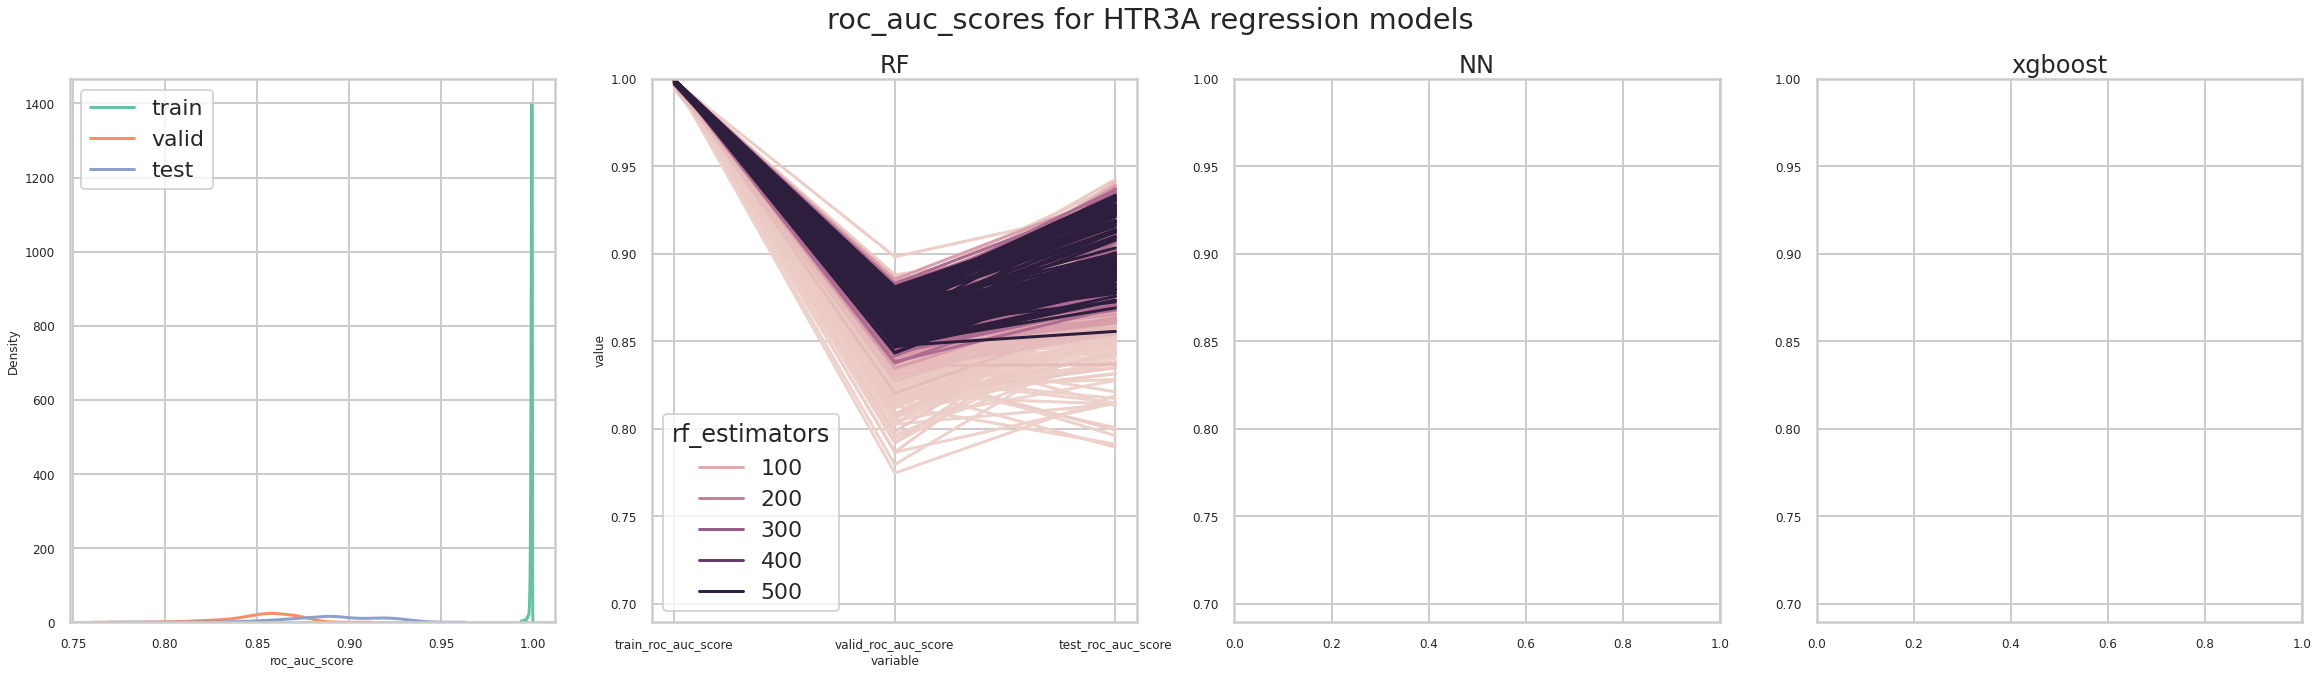

In [20]:
# what are the scores like for train, valid and test sets?

scoretype='roc_auc_score'
subset='valid'
winnertype= f'{subset}_{scoretype}'
plot_df=perf_df[[f"train_{scoretype}",f"valid_{scoretype}",f"test_{scoretype}"]]
# turn off sorting if you have a ton of models.. slow
plot_df=plot_df.sort_values(f"valid_{scoretype}")

fig, ax = plt.subplots(1,4,figsize=(40,10))
sns.kdeplot(perf_df[f'train_{scoretype}'], label="train",ax=ax[0])
sns.kdeplot(perf_df[f'valid_{scoretype}'], label="valid",ax=ax[0])
sns.kdeplot(perf_df[f'test_{scoretype}'], label="test",ax=ax[0])
ax[0].set_xlabel(f'{scoretype}')

ax[0].legend(loc="upper left")
plot_df = perf_df[perf_df.model_type=="RF"]
huefeat = 'rf_estimators'
plot_df=plot_df[[f"train_{scoretype}",f"valid_{scoretype}",f"test_{scoretype}", huefeat, 'model_uuid']]
plot_df=plot_df.sort_values(f"valid_{scoretype}")
plot_df=plot_df.melt(id_vars=['model_uuid',huefeat])
sns.lineplot(data=plot_df, x='variable', y='value', units ='model_uuid', estimator=None, hue=huefeat, legend='brief', ax = ax[1]);
ax[1].set_ylim(perf_df[f'test_{scoretype}'].min()-.1,1)
ax[1].set_title('RF')

plot_df = perf_df[perf_df.model_type=="NN"]
huefeat = 'learning_rate'
plot_df=plot_df[[f"train_{scoretype}",f"valid_{scoretype}",f"test_{scoretype}", huefeat, 'model_uuid']]
plot_df=plot_df.sort_values(f"valid_{scoretype}")
plot_df=plot_df.melt(id_vars=['model_uuid',huefeat])
sns.lineplot(data=plot_df, x='variable', y='value', units ='model_uuid', estimator=None, hue=huefeat, legend='brief', ax = ax[2]);
ax[2].set_ylim(perf_df[f'test_{scoretype}'].min()-.1,1)
ax[2].set_title('NN')

plot_df = perf_df[perf_df.model_type=="xgboost"]
huefeat = 'xgb_learning_rate'
plot_df=plot_df[[f"train_{scoretype}",f"valid_{scoretype}",f"test_{scoretype}", huefeat, 'model_uuid']]
plot_df=plot_df.sort_values(f"valid_{scoretype}")
plot_df=plot_df.melt(id_vars=['model_uuid',huefeat])
sns.lineplot(data=plot_df, x='variable', y='value', units ='model_uuid', estimator=None, hue=huefeat, legend='brief', ax = ax[3]);
ax[3].set_ylim(perf_df[f'test_{scoretype}'].min()-.1,1)
ax[3].set_title('xgboost')

fig.suptitle(f"{scoretype}s for HTR3A regression models");

#### Examine ROC_AUC scores for each feature set
- what do you think of the variability among scores for different model types? Is it different for MAE or RMS scores?

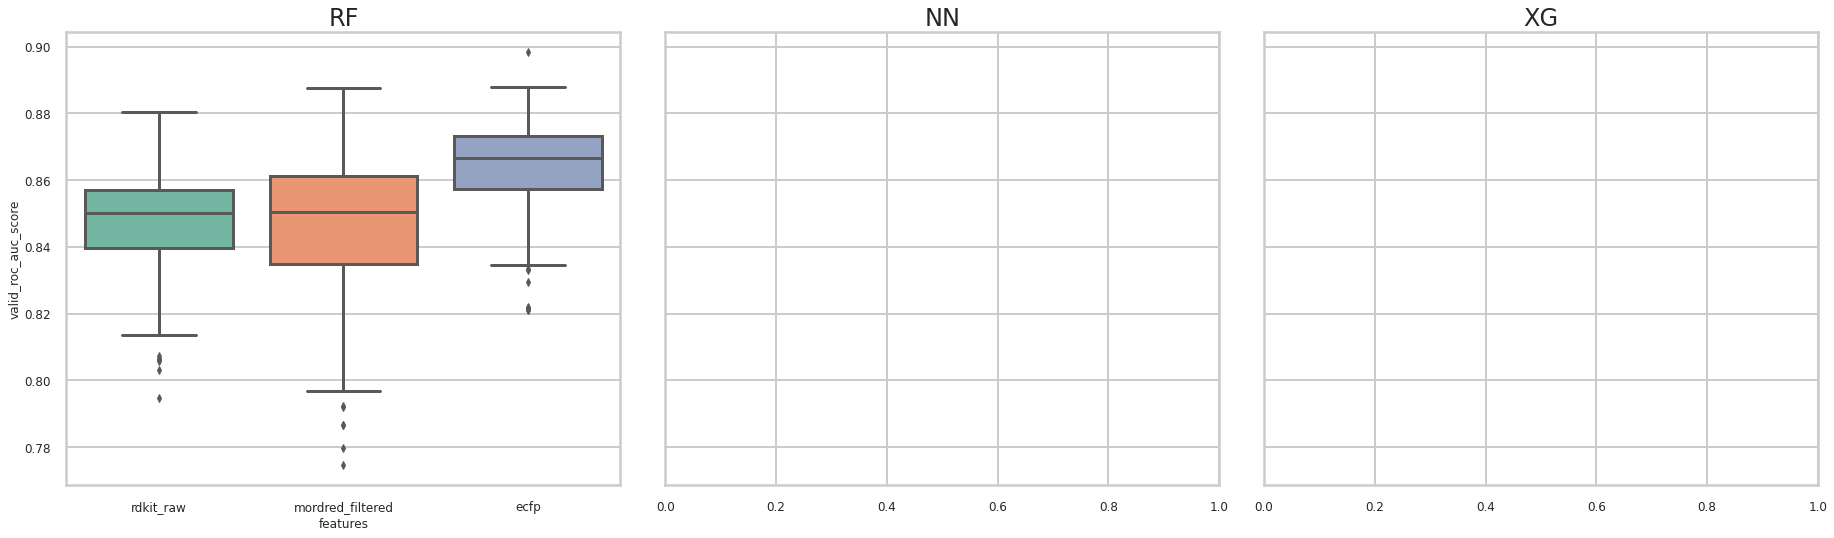

In [21]:
# which feature set works best for each model type?

fig,ax = plt.subplots(1,3,sharey=True, figsize=(26,8))
plot_df = perf_df[perf_df.model_type=='RF']
sns.boxplot(data=plot_df, x="features", y=f"valid_{scoretype}", width = 0.8, ax=ax[0]);
# plot_df = perf_df[perf_df.model_type=='NN']
# sns.boxplot(data=plot_df, x="features", y=f"valid_{scoretype}", width = 0.8, ax=ax[1]);
# plot_df = perf_df[perf_df.model_type=='xgboost']
# sns.boxplot(data=plot_df, x="features", y=f"valid_{scoretype}", width = 0.8, ax=ax[2]);
ax[0].set_title("RF");
ax[1].set_title("NN");
ax[2].set_title("XG");
plt.tight_layout()

#### Examine the effect of RF hyperparameters on model performance
- any major differences between feature sets?
- did you capture the right range of HPs or do you need to expand / zero in on a particular range?

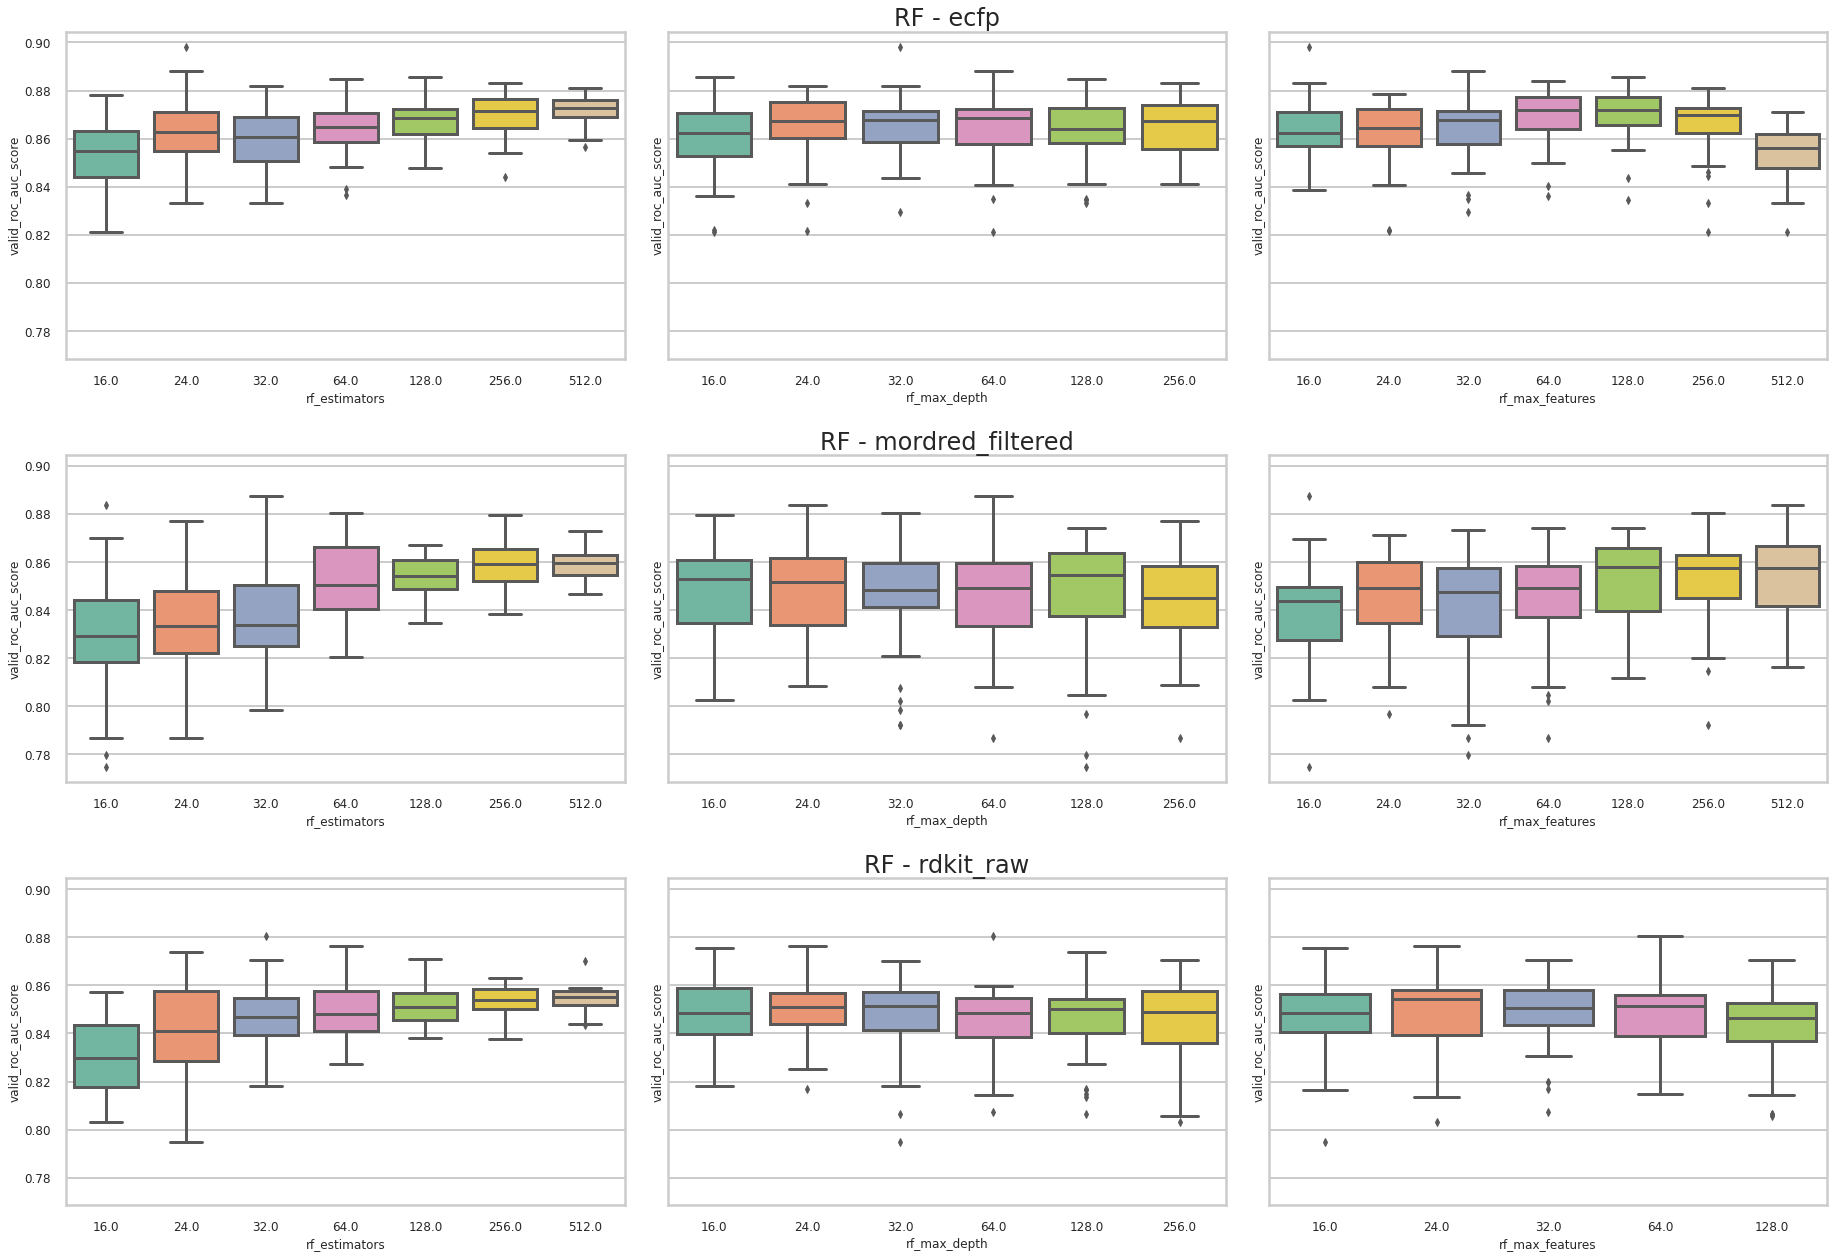

In [22]:
modtype = 'RF'
feat1 = 'rf_estimators'
feat2 = 'rf_max_depth'
feat3 = 'rf_max_features'
sub_df = perf_df[perf_df.model_type==modtype]

fig, ax = plt.subplots(3,3,sharey=True, figsize=(26,18))
plot_df=sub_df[sub_df.features=='ecfp']
sns.boxplot(data=plot_df, x=feat1, y=f"valid_{scoretype}", ax=ax[0,0])
sns.boxplot(data=plot_df, x=feat2, y=f"valid_{scoretype}", ax=ax[0,1])
ax[0,1].set_title(f"{modtype} - {plot_df.features.iloc[0]}")
sns.boxplot(data=plot_df, x=feat3, y=f"valid_{scoretype}", ax=ax[0,2])

plot_df=sub_df[sub_df.features=='mordred_filtered']
sns.boxplot(data=plot_df, x=feat1, y=f"valid_{scoretype}", ax=ax[1,0])
sns.boxplot(data=plot_df, x=feat2, y=f"valid_{scoretype}", ax=ax[1,1])
ax[1,1].set_title(f"{modtype} - {plot_df.features.iloc[0]}")
sns.boxplot(data=plot_df, x=feat3, y=f"valid_{scoretype}", ax=ax[1,2])

plot_df=sub_df[sub_df.features=='rdkit_raw']
sns.boxplot(data=plot_df, x=feat1, y=f"valid_{scoretype}", ax=ax[2,0])
sns.boxplot(data=plot_df, x=feat2, y=f"valid_{scoretype}", ax=ax[2,1])
ax[2,1].set_title(f"{modtype} - {plot_df.features.iloc[0]}")
sns.boxplot(data=plot_df, x=feat3, y=f"valid_{scoretype}", ax=ax[2,2])
fig.tight_layout();

#### Examine NN hyperparameters
- are training or test sets different?

In [23]:
# i didn't train any NN classification models

# modtype = 'NN'
# feat1 = 'dropouts'
# feat2 = 'learning_rate'
# feat3 = 'layer_sizes'
# sub_df = perf_df[perf_df.model_type==modtype]

# fig, ax = plt.subplots(3,3,sharey=True,figsize=(26,18))
# plot_df=sub_df[sub_df.features=='ecfp']
# sns.boxplot(data=plot_df, x=feat1, y=f"valid_{scoretype}", ax=ax[0,0])
# sns.boxplot(data=plot_df, x=feat2, y=f"valid_{scoretype}", ax=ax[0,1])
# ax[0,1].set_title(f"{modtype} - {plot_df.features.iloc[0]}")
# sns.boxplot(data=plot_df, x=feat3, y=f"valid_{scoretype}", ax=ax[0,2])

# plot_df=sub_df[sub_df.features=='mordred_filtered']
# sns.boxplot(data=plot_df, x=feat1, y=f"valid_{scoretype}", ax=ax[1,0])
# sns.boxplot(data=plot_df, x=feat2, y=f"valid_{scoretype}", ax=ax[1,1])
# ax[1,1].set_title(f"{modtype} - {plot_df.features.iloc[0]}")
# sns.boxplot(data=plot_df, x=feat3, y=f"valid_{scoretype}", ax=ax[1,2])

# plot_df=sub_df[sub_df.features=='rdkit_raw']
# sns.boxplot(data=plot_df, x=feat1, y=f"valid_{scoretype}", ax=ax[2,0])
# sns.boxplot(data=plot_df, x=feat2, y=f"valid_{scoretype}", ax=ax[2,1]); ax[2,1].tick_params(axis='x', rotation=45);
# ax[2,1].set_title(f"{modtype} - {plot_df.features.iloc[0]}")
# sns.boxplot(data=plot_df, x=feat3, y=f"valid_{scoretype}", ax=ax[2,2])
# fig.tight_layout();

#### Examine XGBoost hyperparameters
- what is the third graph?
- how do scores compare when plotted against each other?


In [24]:
# i didn't train xgboost classification models

# modtype = 'xgboost'
# feat1 = 'xgb_gamma'
# feat2 = 'xgb_learning_rate'
# feat3 = 'valid_mae_score'
# sub_df = perf_df[perf_df.model_type==modtype]

# fig, ax = plt.subplots(3,3,sharey=True, figsize=(26,18))
# plot_df=sub_df[sub_df.features=='ecfp']
# sns.boxplot(data=plot_df, x=feat1, y=f"valid_{scoretype}", ax=ax[0,0])
# sns.boxplot(data=plot_df, x=feat2, y=f"valid_{scoretype}", ax=ax[0,1])
# ax[0,1].set_title(f"{modtype} - {plot_df.features.iloc[0]}")
# sns.scatterplot(data=plot_df, x=feat3, y=f"valid_{scoretype}", ax=ax[0,2])

# plot_df=sub_df[sub_df.features=='mordred_filtered']
# sns.boxplot(data=plot_df, x=feat1, y=f"valid_{scoretype}", ax=ax[1,0])
# sns.boxplot(data=plot_df, x=feat2, y=f"valid_{scoretype}", ax=ax[1,1])
# ax[1,1].set_title(f"{modtype} - {plot_df.features.iloc[0]}")
# sns.scatterplot(data=plot_df, x=feat3, y=f"valid_{scoretype}", ax=ax[1,2])

# plot_df=sub_df[sub_df.features=='rdkit_raw']
# sns.boxplot(data=plot_df, x=feat1, y=f"valid_{scoretype}", ax=ax[2,0])
# sns.boxplot(data=plot_df, x=feat2, y=f"valid_{scoretype}", ax=ax[2,1]); ax[2,1].tick_params(axis='x', rotation=45);
# ax[2,1].set_title(f"{modtype} - {plot_df.features.iloc[0]}")
# sns.scatterplot(data=plot_df, x=feat3, y=f"valid_{scoretype}", ax=ax[2,2])
# fig.tight_layout();

# Choose best model and examine predictions (classification models)
Metrics to assess classification models: (google definitions)
- cross_entropy
- kappa
- matthews_cc
- npv
- prc_auc_score
- precision
- recall_score
- roc_auc_score
- balanced_accuracy

### Challenge: try adding balanced accuracy scores into this plot

#### select best models & visualize metrics with radar plot

In [25]:
# best models per metric
top_xnt_model = perf_df[perf_df.valid_cross_entropy==perf_df.valid_cross_entropy.min()] # minimize cross entropy, maximize rest
top_kap_model = perf_df[perf_df.valid_kappa==perf_df.valid_kappa.max()]
top_mcc_model = perf_df[perf_df.valid_matthews_cc==perf_df.valid_matthews_cc.max()]
top_npv_model = perf_df[perf_df.valid_npv==perf_df.valid_npv.max()]
top_prc_model = perf_df[perf_df.valid_prc_auc_score==perf_df.valid_prc_auc_score.max()]
top_pre_model = perf_df[perf_df.valid_precision==perf_df.valid_precision.max()]
top_rec_model = perf_df[perf_df.valid_recall_score==perf_df.valid_recall_score.max()]
top_roc_model = perf_df[perf_df.valid_roc_auc_score==perf_df.valid_roc_auc_score.max()] 

topmods = pd.concat([top_xnt_model, top_kap_model, top_mcc_model, top_npv_model, top_prc_model, top_pre_model, top_rec_model, top_roc_model])
# note: fewer different model_uuids here than metrics from some models winning at more than one metric
topmods = topmods.drop_duplicates()
topmods

,collection,model_uuid,time_built,prediction_type,model_type,featurizer,features,transformer,splitter,split_strategy,split_uuid,umap_dim,umap_targ_wt,umap_neighbors,umap_min_dist,layer_sizes,dropouts,learning_rate,best_epoch,max_epochs,rf_estimators,rf_max_features,rf_max_depth,xgb_gamma,xgb_learning_rate,dataset_bucket,dataset_key,dataset_size,parameter,train_size,train_roc_auc_score,train_prc_auc_score,train_accuracy_score,train_precision,train_recall_score,train_npv,train_matthews_cc,train_kappa,train_cross_entropy,valid_size,valid_roc_auc_score,valid_prc_auc_score,valid_accuracy_score,valid_precision,valid_recall_score,valid_npv,valid_matthews_cc,valid_kappa,valid_cross_entropy,test_size,test_roc_auc_score,test_prc_auc_score,test_accuracy_score,test_precision,test_recall_score,test_npv,test_matthews_cc,test_kappa,test_cross_entropy
1831,/content/drive/MyDrive/Columbia_E4511/HTR3A_mo...,bb9d4274-55f2-40b2-9a7e-d74d356d1b2b,1.618016e+09,classification,RF,ecfp,ecfp,normalization,scaffold,train_valid_test,ead9410d-7abc-41cc-8713-f78dac0106a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,16.0,32.0,NaN,NaN,public,/content/drive/MyDrive/Columbia_E4511/HTR3A_cu...,1002,active,801,0.998746,0.999011,0.982522,0.978070,0.991111,0.988406,0.964547,0.964435,0.106870,100,0.898305,0.876769,0.810000,0.739130,0.829268,0.870370,0.617635,0.614448,0.418890,101,0.926022,0.919234,0.831683,0.770833,0.860465,0.886792,0.664185,0.660873,0.370678
1572,/content/drive/MyDrive/Columbia_E4511/HTR3A_mo...,6112f135-53c1-44ec-83d2-5313157ee5f3,1.618019e+09,classification,RF,computed_descriptors,mordred_filtered,normalization,scaffold,train_valid_test,ead9410d-7abc-41cc-8713-f78dac0106a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,16.0,64.0,NaN,NaN,public,/content/drive/MyDrive/Columbia_E4511/HTR3A_cu...,989,active,792,0.999227,0.999389,0.988636,0.986755,0.993333,0.991150,0.976847,0.976818,0.115104,96,0.887583,0.862662,0.833333,0.755102,0.902439,0.914894,0.677089,0.667676,0.467103,101,0.881716,0.868409,0.811881,0.760870,0.813953,0.854545,0.619841,0.618716,0.461152
1828,/content/drive/MyDrive/Columbia_E4511/HTR3A_mo...,156cc446-79b5-400e-92d9-ecb479426b86,1.618016e+09,classification,RF,ecfp,ecfp,normalization,scaffold,train_valid_test,ead9410d-7abc-41cc-8713-f78dac0106a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,32.0,24.0,NaN,NaN,public,/content/drive/MyDrive/Columbia_E4511/HTR3A_cu...,1002,active,801,0.998145,0.998587,0.978777,0.975824,0.986667,0.982659,0.956904,0.956827,0.118024,100,0.877635,0.864475,0.810000,0.711538,0.902439,0.916667,0.638125,0.622716,0.467096,101,0.922614,0.911590,0.841584,0.775510,0.883721,0.903846,0.686672,0.681764,0.387732
1710,/content/drive/MyDrive/Columbia_E4511/HTR3A_mo...,75d5d415-08f0-4653-81de-a46e5001e739,1.618024e+09,classification,RF,computed_descriptors,mordred_filtered,normalization,scaffold,train_valid_test,ead9410d-7abc-41cc-8713-f78dac0106a8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,512.0,24.0,NaN,NaN,public,/content/drive/MyDrive/Columbia_E4511/HTR3A_cu...,989,active,792,0.998990,0.999168,0.988636,0.991091,0.988889,0.985423,0.976853,0.976850,0.107622,96,0.883592,0.814892,0.822917,0.800000,0.780488,0.839286,0.637156,0.637011,0.795430,101,0.849639,0.841955,0.801980,0.755556,0.790698,0.839286,0.597934,0.597449,0.482292


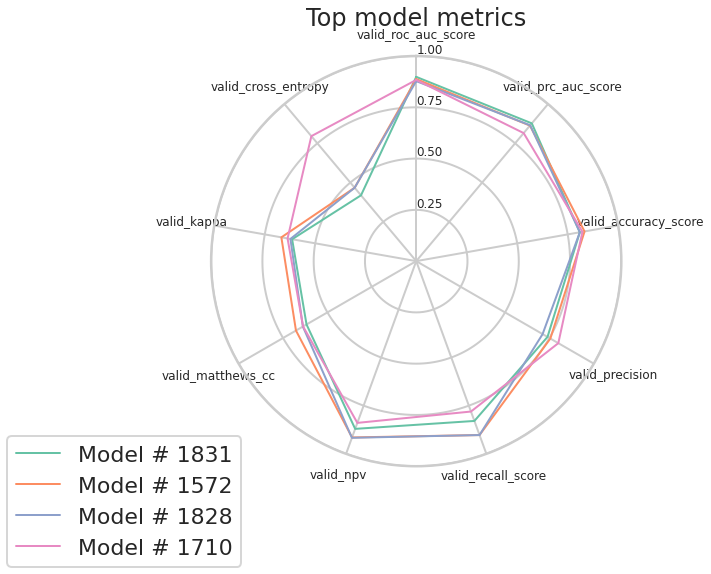

In [26]:
import math
plot_df=topmods
categories = ['valid_roc_auc_score','valid_prc_auc_score','valid_accuracy_score','valid_precision', 'valid_recall_score', 'valid_npv', 'valid_matthews_cc', 'valid_kappa', 'valid_cross_entropy']
# categories_2 = ['best_train_r2_score','best_valid_r2_score','best_train_mae_score','best_valid_mae_score','best_train_rms_score',  'best_valid_rms_score']
N=len(categories)
angles = [n / float(N) * 2 * math.pi for n in range(N)]
angles += angles[:1]
fig, ax = plt.subplots(1,1,figsize=(10,10), subplot_kw=dict(polar=True))
ax.set_theta_offset(math.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
ax.set_yticks([.25,0.5,0.75,1])
ax.set_ylim(0,1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
for ilocn in plot_df.index:
    values=plot_df.loc[ilocn][categories].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f"Model # {ilocn}")
#         ax.fill(angles, values, 'b', alpha=0.05)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
ax.set_title(f"Top model metrics", y=1.06);
fig.tight_layout()

#### select models and generate predictions
- predict on the same dataset as the model was trained on first

In [27]:
from atomsci.ddm.pipeline import predict_from_model as pfm

In [28]:
preds = []
for i, mod in topmods.iterrows():
  model_path = f"{mod.collection}/{mod.dataset_key.split('/')[-1].strip('.csv')}_model_{mod.model_uuid}.tar.gz"
  split_df = pd.read_csv(f"/content/drive/MyDrive/Columbia_E4511/HTR3A_curated_train_valid_test_scaffold_{mod.split_uuid}.csv")
  if mod.features in ['rdkit_raw', 'mordred_filtered']:
    feat_df = pd.read_csv(f'/content/drive/MyDrive/Columbia_E4511/scaled_descriptors/HTR3A_curated_with_{mod.features}_descriptors.csv')
    feat_df = feat_df[~feat_df.VALUE_NUM_mean.isna()]
    feat_df = feat_df[feat_df.VALUE_NUM_mean>2]
    is_featurized = True
  else:
    feat_df = pd.read_csv(mod.dataset_key)
    feat_df = feat_df[~feat_df.VALUE_NUM_mean.isna()]
    feat_df = feat_df[feat_df.VALUE_NUM_mean>2]
    is_featurized = False
  pred_df = pfm.predict_from_model_file(model_path= model_path, input_df=feat_df, id_col='compound_id', smiles_col = 'base_rdkit_smiles', 
                        response_col = 'active', is_featurized = is_featurized, dont_standardize=True)
  pred_df = pd.merge(pred_df, split_df, left_on='compound_id', right_on='cmpd_id')
  pred_df = pred_df.rename(columns={'active_actual':'active'})
  preds.append(pred_df)

2021-04-15 16:13:09,458 ['time_generated', 'time_built', 'dataset_metadata', 'training_metrics'] are not part of the accepted list of parameters and will be ignored


Featurization = DynamicFeaturization with ecfp features
number of features: 1024
Reading descriptor spec table from /usr/local/lib/python3.7/site-packages/atomsci/ddm/data/descriptor_sets_sources_by_descr_type.csv
Featurization = DescriptorFeaturization with mordred_filtered descriptors
number of features: 1555


/usr/local/lib/python3.7/site-packages/atomsci/ddm/pipeline/transformations.py:225: RuntimeWarning: invalid value encountered in true_divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)


TIMING: dataset construction took 0.625 s
Loading dataset from disk.
Featurization = DynamicFeaturization with ecfp features
number of features: 1024
Featurization = DescriptorFeaturization with mordred_filtered descriptors
number of features: 1555


/usr/local/lib/python3.7/site-packages/atomsci/ddm/pipeline/transformations.py:225: RuntimeWarning: invalid value encountered in true_divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)


TIMING: dataset construction took 0.609 s
Loading dataset from disk.


In [29]:
preds[0]

,compound_id,base_rdkit_smiles,active,active_prob,active_pred,cmpd_id,subset,fold
0,10247701,c1ccc2c(N3CCN(CCc4ccc5nc[nH]c5c4)CC3)cccc2c1,0.0,0.234069,0,10247701,test,0
1,10355682,C/N=C1\N(C)C(=O)/C(=C\c2c[nH]c3ccccc23)N1C,0.0,0.041667,0,10355682,train,0
2,108000,Cn1cc(C(=O)[C@@H]2CCc3nc[nH]c3C2)c2ccccc21,1.0,0.978791,1,108000,train,0
3,10826756,CN1CCN(c2nc3cc(O)ccc3n3cccc23)CC1,1.0,0.987778,1,10826756,train,0
4,11162995,c1ccc(-c2cnc3oc(N4CCN5CCC4CC5)nc3c2)cc1,0.0,0.240021,0,11162995,train,0
...,...,...,...,...,...,...,...,...
984,CHEMBL76370,CCCCCNC(N)=N/N=C/c1c[nH]c2ccc(OC)cc12,0.0,0.041667,0,CHEMBL76370,train,0
985,CHEMBL83954,COc1cc(N)c(Cl)cc1C(=O)OCCCN1CCCCC1,0.0,0.119722,0,CHEMBL83954,train,0
986,CHEMBL85,CC1=NC2=CCCCN2C(=O)C1CCN1CCC(c2noc3cc(F)ccc23)CC1,0.0,0.234226,0,CHEMBL85,test,0
987,CHEMBL90314,COc1c(I)cc(Cl)cc1C(=O)N[C@@H]1CN2CCC1CC2,1.0,0.953056,1,CHEMBL90314,train,0


#### Plot confusion matrices and other plots
- confusion matrix (active vs inactive)
- reciever-operating curve
  - what does a "good" curve look like?
- precision-recall curve
  - what does a "good" curve look like?
- when is it appropriate to use predicted class versus class probabilities?
- what do the graphs look like if you change to _pred from _prob?

In [34]:
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, r2_score, precision_recall_curve, average_precision_score, confusion_matrix, precision_score, recall_score, balanced_accuracy_score
import itertools
sns.set_style('white')

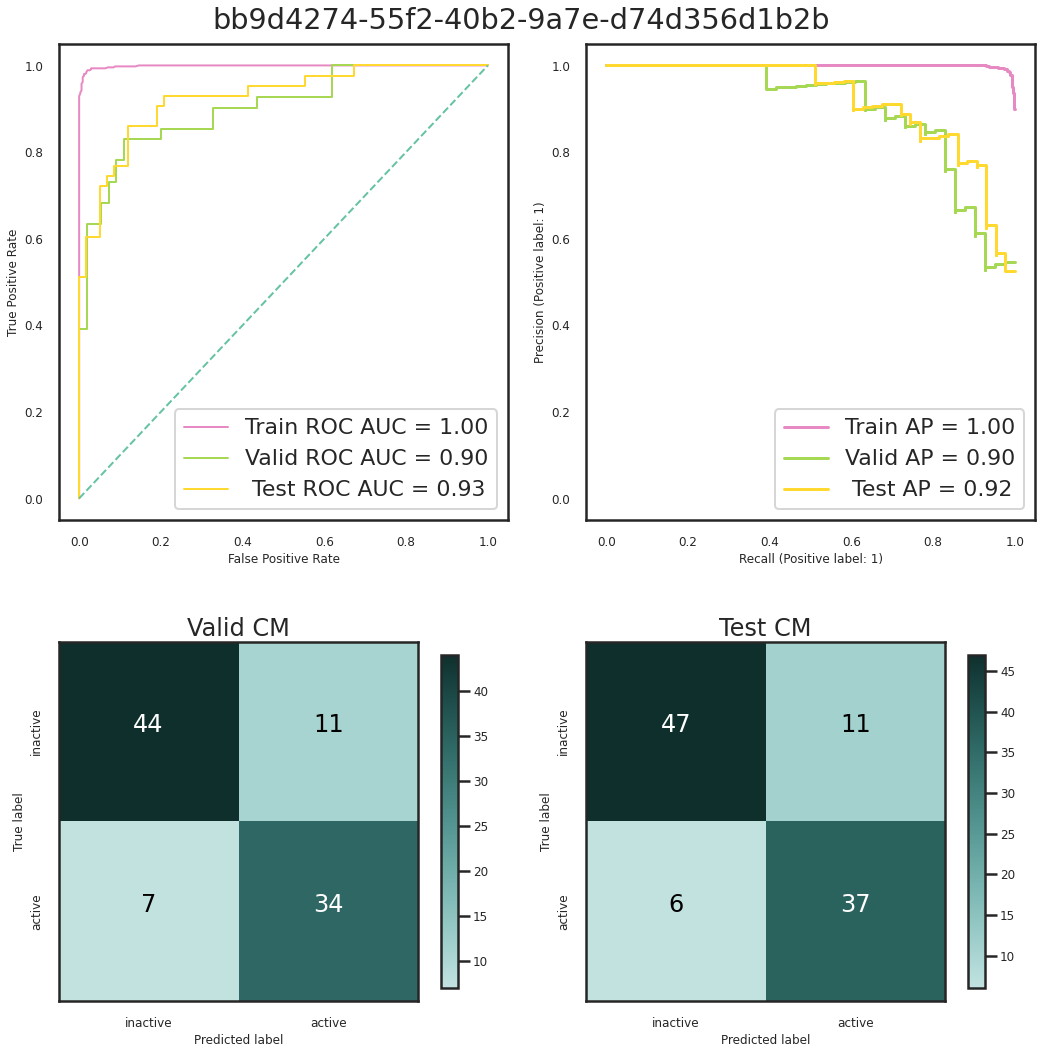

In [36]:
full_df=preds[0]
model_uuid = topmods.model_uuid.tolist()[0]
response_col = 'active'
# graph
fig, ax = plt.subplots(2,2, sharex=False, sharey=False, figsize=(15,15))
ax=ax.ravel()

# training set    
pred_df=full_df[full_df.subset=='train']
# roc curve
roc_auc = roc_auc_score(pred_df[f'{response_col}'], pred_df[f'{response_col}_prob'])
fpr, tpr, _ = roc_curve(pred_df[f'{response_col}'], pred_df[f'{response_col}_prob'])
lw = 2
ax[0].plot(fpr, tpr, lw=lw, label='Train ROC AUC = %0.2f' % roc_auc, color = pal[3])
# prc 
average_precision = average_precision_score(pred_df[f'{response_col}'], pred_df[f'{response_col}_prob'])
precision, recall, _ = precision_recall_curve(pred_df[f'{response_col}'], pred_df[f'{response_col}_prob'])
line_kwargs = {"drawstyle": "steps-post"}
line_kwargs["label"] = (f"Train AP = "
                        f"{average_precision:0.2f}")
ax[1].plot(recall, precision, color=pal[3], **line_kwargs) 

# validation set
pred_df=full_df[full_df.subset=='valid']
# ROC AUC curve
roc_auc = roc_auc_score(pred_df[f'{response_col}'], pred_df[f'{response_col}_prob'])
fpr, tpr, _ = roc_curve(pred_df[f'{response_col}'], pred_df[f'{response_col}_prob'])
lw = 2
line_kwargs = {"drawstyle": "steps-post"}
ax[0].plot(fpr, tpr, lw=lw, label='Valid ROC AUC = %0.2f' % roc_auc, color = pal[4], **line_kwargs)
# PR curve
average_precision = average_precision_score(pred_df[f'{response_col}'], pred_df[f'{response_col}_prob'])
precision, recall, _ = precision_recall_curve(pred_df[f'{response_col}'], pred_df[f'{response_col}_prob'])
line_kwargs = {"drawstyle": "steps-post"}
line_kwargs["label"] = (f"Valid AP = "
                        f"{average_precision:0.2f}")
ax[1].plot(recall, precision, color=pal[4], **line_kwargs)
# confusion matrix - valid set
cm=confusion_matrix(pred_df[f'{response_col}'], pred_df[f'{response_col}_pred'])
class_names = ['inactive','active']
im = plot_confusion_matrix(cm, classes=class_names, normalize=False, cmap=sns.cubehelix_palette(rot=0, start=2.40, as_cmap=True), ax=ax[2])
fig.colorbar(mappable=im, ax=ax[2], shrink=0.7)
ax[2].set_title("Valid CM")

# test set    
pred_df=full_df[full_df.subset=='test']
# ROC AUC curve
roc_auc = roc_auc_score(pred_df[f'{response_col}'], pred_df[f'{response_col}_prob'])
fpr, tpr, _ = roc_curve(pred_df[f'{response_col}'], pred_df[f'{response_col}_prob'])
lw = 2
line_kwargs = {"drawstyle": "steps-post"}
ax[0].plot(fpr, tpr, lw=lw, label=' Test ROC AUC = %0.2f' % roc_auc, color = pal[5], **line_kwargs)
ax[0].plot([0, 1], [0, 1], lw=lw, linestyle='--')
ax[0].set_xlim([-0.05, 1.05])
ax[0].set_ylim([-0.05, 1.05])
ax[0].set_xlabel('False Positive Rate')
ax[0].set_ylabel('True Positive Rate')
ax[0].legend(loc="lower right")
# PR curve
average_precision = average_precision_score(pred_df[f'{response_col}'], pred_df[f'{response_col}_prob'])
precision, recall, _ = precision_recall_curve(pred_df[f'{response_col}'], pred_df[f'{response_col}_prob'])
line_kwargs = {"drawstyle": "steps-post"}
line_kwargs["label"] = (f" Test AP = "
                        f"{average_precision:0.2f}")
ax[1].plot(recall, precision, color=pal[5], **line_kwargs)
pos_label=1
info_pos_label = (f" (Positive label: {pos_label})")
xlabel = "Recall" + info_pos_label
ylabel = "Precision" + info_pos_label
ax[1].set(xlabel=xlabel, ylabel=ylabel)
ax[1].set_xlim([-0.05, 1.05])
ax[1].set_ylim([-0.05, 1.05])
ax[1].legend(loc="lower right")
# confusion matrix
cm=confusion_matrix(pred_df[f'{response_col}'], pred_df[f'{response_col}_pred'])
im=plot_confusion_matrix(cm, classes=class_names, normalize=False, cmap=sns.cubehelix_palette(rot=0, start=2.40, as_cmap=True), ax=ax[3])
fig.colorbar(mappable=im, ax=ax[3], shrink=0.7)
ax[3].set_title("Test CM")
plt.tight_layout()
fig.suptitle(f'{model_uuid}', y=1.01);

# Predict on new data (classification)

#### Generate predictions on a list of compounds from another target (such as provided by your partners)
- there will be activity values associated with this target. You can explore overlaps between the two targets
- here, my best models are predicting activity of the serotonin receptor, HTR3A
- i will compare with data from the serotonin transporter, SLC6A4

In [37]:
from atomsci.ddm.utils import curate_data
from atomsci.ddm.utils import struct_utils as su

In [38]:
# new data must have curated smiles strings, with rdkit standardization, featurizations, etc.
newcmpds = pd.read_csv("/content/drive/MyDrive/Columbia_E4511/SLC6A4_chembl.csv", sep=";")
newcmpds = curate_data.average_and_remove_duplicates('pChEMBL Value', 100, False, data=newcmpds, compound_id='Molecule ChEMBL ID', smiles_col='Smiles')
newcmpds['base_rdkit_smiles']=su.base_smiles_from_smiles(newcmpds.Smiles.tolist())
newcmpds = newcmpds.rename(columns = {'Molecule ChEMBL ID':'compound_id'})
newcmpds = curate_data.aggregate_assay_data(newcmpds, value_col='VALUE_NUM_mean', output_value_col='VALUE_NUM_mean', label_actives=True, active_thresh=7, id_col='compound_id', smiles_col='base_rdkit_smiles', relation_col = 'Standard Relation')
newcmpds = newcmpds[~newcmpds.base_rdkit_smiles.isna()]
newcmpds = newcmpds[~newcmpds.VALUE_NUM_mean.isna()]
newcmpds = newcmpds[newcmpds.VALUE_NUM_mean!='']
newcmpds.to_csv("/content/drive/MyDrive/Columbia_E4511/SLC6A4_chembl_cur.csv", index = False)
newcmpds.head()

Bad duplicates removed from dataset
Dataframe size (4365, 49)

Dataset de-duplicated
Dataframe size (3783, 49)
New column created with averaged values:  VALUE_NUM_mean
1 entries in input table are missing SMILES strings
3732 unique SMILES strings are reduced to 3729 unique base SMILES strings


,compound_id,base_rdkit_smiles,relation,VALUE_NUM_mean,active
0,CHEMBL1171260,C[C@@H]1N(C)C(C)(C)CO[C@@]1(O)c1cccc(Cl)c1,,6.270,0
2,CHEMBL196468,CN(C)C[C@H]1C[C@@H]1c1c[nH]c2ccc(C#N)cc12,,9.354,1
4,CHEMBL3703738,Cc1noc(C)c1-c1ccc2c(c1)CNCC2c1ccc(Cl)c(Cl)c1,,8.310,1
6,CHEMBL211363,COc1cccc2c1C[C@@H](N(CCCc1c[nH]c3ccc(F)cc13)C1...,,6.130,0
7,CHEMBL2380973,N#Cc1c[nH]c2ccc([C@@H]3CCC[C@H]3CN3CCCC3)cc12,,6.520,0


In [ ]:
# next cells will be very slow if you have mordred features. 
# Get the featurized data first and then say featurized = true

In [43]:
preds = []
# for i, mod in topmods.iloc[1,:].iterrows(): 
# run with one ecfp model for demo
mod = topmods.iloc[0,:]
model_path = f"{mod.collection}/{mod.dataset_key.split('/')[-1].strip('.csv')}_model_{mod.model_uuid}.tar.gz"
pred_df = pfm.predict_from_model_file(model_path= model_path, input_df=newcmpds, id_col='compound_id', smiles_col = 'base_rdkit_smiles', 
                      response_col = 'active', is_featurized = False, dont_standardize=True)
pred_df = pred_df.rename(columns={'active_actual':'active'})
preds.append(pred_df)

Featurization = DynamicFeaturization with ecfp features
number of features: 1024


In [60]:
# remember - active here is the IC50 values for other target SLC6A4 (that's where the dataset comes from)
# active_pred is your predictions for YOUR target (HTR3A), not the other target
# SLC6A4 is a serotonin transporter
# HTR3A is a serotonin receptor
# related targets, but not the same. Will be interesting to see overlaps in activity
preds[0]

,compound_id,base_rdkit_smiles,active,active_prob,active_pred
1069,CHEMBL100941,COC(=O)C1C2CCC(C2)CC1c1ccc(Cl)c(Cl)c1,1.0,0.335648,0
1403,CHEMBL101055,COc1cccc(C(CN(C)C)C2(O)CCCCC2)c1,1.0,0.126667,0
769,CHEMBL101250,Cc1ccc([C@H]2C[C@H]3CCC4C2[C@](C)(O)CN43)cc1,0.0,0.375000,0
2106,CHEMBL101899,CN(C)CC(c1cccc(Cl)c1)C1(O)CCCCC1,0.0,0.085000,0
1326,CHEMBL101905,C=C1CN2C3CC[C@@H]2C[C@H](c2ccc(C)cc2)C13,1.0,0.458333,0
...,...,...,...,...,...
792,CHEMBL954,CCN(CC)CCOc1ccc(/C(=C(/Cl)c2ccccc2)c2ccccc2)cc1,0.0,0.416667,0
557,CHEMBL9831,COc1cccc2c1CCCC2CN(C)CCc1ccc2c(c1)OCO2,1.0,0.250000,0
200,CHEMBL990,CN(Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,0.0,0.120536,0
514,CHEMBL99653,CN(C)CC(c1cccc(C(F)(F)F)c1)C1(O)CCCCC1,0.0,0.126667,0


#### Visualize predictions that don't have ground truth associated with them


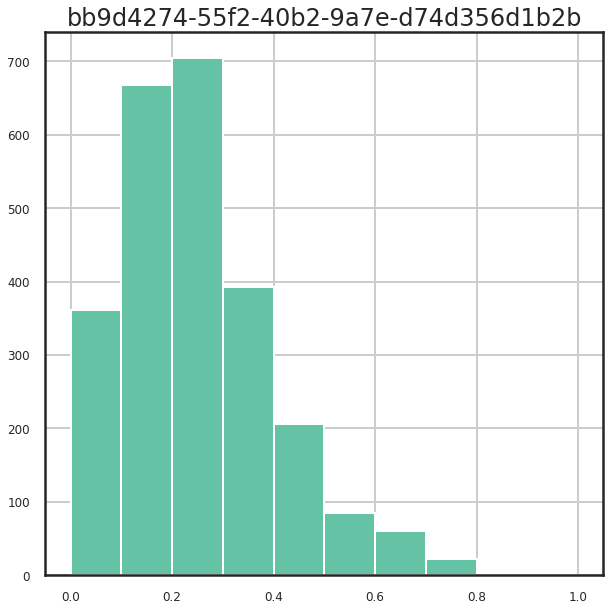

In [50]:
# active prob hist
fig, ax = plt.subplots(1, sharex=True, sharey=True, figsize = (10,10))
preds[0].hist('active_prob', bins=10, ax=ax)
ax.set_title(topmods.model_uuid.tolist()[0]);

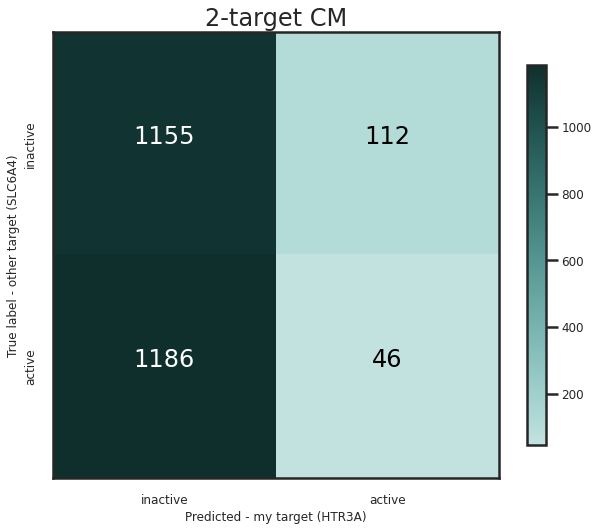

In [64]:
# confusion matrix - your target predictions vs other target classes
cm=confusion_matrix(preds[0][f'{response_col}'], preds[0][f'{response_col}_pred'])
fig, ax = plt.subplots(1,figsize=(10,10))
class_names = ['inactive','active']
im = plot_confusion_matrix(cm, classes=class_names, normalize=False, cmap=sns.cubehelix_palette(rot=0, start=2.40, as_cmap=True), ax=ax)
fig.colorbar(mappable=im, ax=ax, shrink=0.7)
ax.set_xlabel('Predicted - my target (HTR3A)')
ax.set_ylabel('True label - other target (SLC6A4)')
ax.set_title("2-target CM");

#### Tanimoto distance from train to new compounds
- what does a tanimoto distance of zero represent?
- what do you think about the distances between your training data and the new data? are the compounds similar or different?
- what do you think this means for the uncertainty of new predictions?

In [65]:
from atomsci.ddm.pipeline import chem_diversity as cd

In [66]:
htr3a=h1
calc_type='nearest'
dist_metric='tanimoto'
smiles_lst2=newcmpds.base_rdkit_smiles.tolist()
htr3a=htr3a.merge(split_df, left_on='compound_id', right_on='cmpd_id')
smiles_lst1=htr3a[htr3a.subset=='train'].base_rdkit_smiles.tolist()
dists=cd.calc_dist_smiles('ECFP',dist_metric,smiles_lst2,smiles_lst1,calc_type)
distsdf=pd.DataFrame([smiles_lst2,list(dists)], columns=range(len(smiles_lst2)), index=['smiles','dists']).T
df=newcmpds
df=df.merge(distsdf, left_on='base_rdkit_smiles', right_on='smiles')
print(len(set(smiles_lst2)-set(smiles_lst1)))
print(list(df.loc[df.dists==0, 'compound_id']))

2487
['CHEMBL2391541', 'CHEMBL4128926', 'CHEMBL1729', 'CHEMBL453996', 'CHEMBL42', 'CHEMBL3942511', 'CHEMBL56564', 'CHEMBL444985', 'CHEMBL3963788', 'CHEMBL2204360', 'CHEMBL30713', 'CHEMBL2047574']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


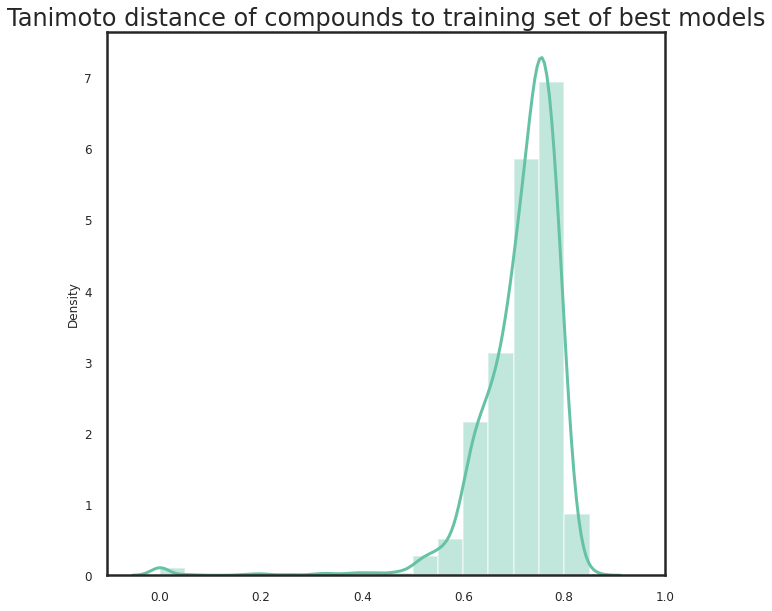

In [67]:
fig, axes = plt.subplots(1, figsize=(10,10))
sns.distplot(dists, ax=axes, bins=np.arange(-0.05,1,0.05))
axes.set_title("Tanimoto distance of compounds to training set of best models");

# Explore the domain of applicability of your model

#### Make sure you have featurized data to use for UMAPs
graphconv you can't do umaps

In [68]:
newcmpds.to_csv("/content/drive/MyDrive/Columbia_E4511/SLC6A4_chembl_cur.csv")

In [69]:
# to create umaps on training data, you need features for the model type.
# rdkit and mordred should already be featurized if you built models with them
# ecfp doesn't have saved features, so extract them now for the training data and new data
# just change the train_file to featurize the other dataset
from atomsci.ddm.pipeline import featurization as feat

train_file = "/content/drive/MyDrive/Columbia_E4511/SLC6A4_chembl_cur.csv"
response_col = "VALUE_NUM_mean"
compound_id = "compound_id"
smiles_col = "base_rdkit_smiles"
result_dir = "/content/drive/MyDrive/Columbia_E4511/HTR3A_models"
params = {
        "system": "LC",
        "lc_account": 'None',
        "datastore": "False",
        "save_results": "False",
        "data_owner": "username",
        "dataset_key": train_file,
        "id_col": compound_id,
        "smiles_col": smiles_col,
        "response_cols": response_col,
        "previously_split": "False",
        "split_only": "True",
        # "model_type": "RF",
        "verbose": "True",
        "transformers": "True",
        'max_epochs': '70',
        "rerun": "False",
        "result_dir": result_dir,
        "featurizer":"ecfp"
    }
pparams = parse.wrapper(params)
MP = mp.ModelPipeline(pparams)
featurization=None
# comment out this line after splitting once so you don't re-split
MP.run_mode = 'training'
MP.params.split_only = True
MP.params.previously_split = False
if featurization is None:
    featurization = feat.create_featurization(MP.params)
MP.featurization = featurization
MP.load_featurize_data()

number of features: 1024


In [70]:
ecfp = MP.data.dataset.X
y=MP.data.dataset.y
ids=MP.data.dataset.ids
yids = [ids, y]
yids.extend(ecfp.T)
ecfpfeats = pd.DataFrame(yids).T
ecfp_colnames = ['compound_id', 'mol_wt']
col2 = list(range(0,1024))
col2 = ['ecfp_'+ str(x) for x in col2]
ecfp_colnames.extend(col2)
ecfpfeats.columns = ecfp_colnames
ecfpfeats.to_csv('/content/drive/MyDrive/Columbia_E4511/scaled_descriptors/SLC6A4_chembl_cur_with_ecfp_descriptors.csv')

#### UMAP projection of new compounds onto the training dataset
- create umap of training data
- use the mapper object to project new compounds onto the training data
- visualize prediction uncertainty or ADI as hue

In [71]:
import umap

In [73]:
preds[0]

,compound_id,base_rdkit_smiles,active,active_prob,active_pred
1069,CHEMBL100941,COC(=O)C1C2CCC(C2)CC1c1ccc(Cl)c(Cl)c1,1.0,0.335648,0
1403,CHEMBL101055,COc1cccc(C(CN(C)C)C2(O)CCCCC2)c1,1.0,0.126667,0
769,CHEMBL101250,Cc1ccc([C@H]2C[C@H]3CCC4C2[C@](C)(O)CN43)cc1,0.0,0.375000,0
2106,CHEMBL101899,CN(C)CC(c1cccc(Cl)c1)C1(O)CCCCC1,0.0,0.085000,0
1326,CHEMBL101905,C=C1CN2C3CC[C@@H]2C[C@H](c2ccc(C)cc2)C13,1.0,0.458333,0
...,...,...,...,...,...
792,CHEMBL954,CCN(CC)CCOc1ccc(/C(=C(/Cl)c2ccccc2)c2ccccc2)cc1,0.0,0.416667,0
557,CHEMBL9831,COc1cccc2c1CCCC2CN(C)CCc1ccc2c(c1)OCO2,1.0,0.250000,0
200,CHEMBL990,CN(Cc1ccc(C(C)(C)C)cc1)Cc1cccc2ccccc12,0.0,0.120536,0
514,CHEMBL99653,CN(C)CC(c1cccc(C(F)(F)F)c1)C1(O)CCCCC1,0.0,0.126667,0


In [74]:
cols_dict={
    'ecfp':('ecfp_0','ecfp_1023'),
    'mordred_filtered':('ABC','SsBr'),
    'rdkit_raw':('MaxEStateIndex','fr_urea'),
}
# features model was created on, for training data
feat_type = 'ecfp'
feats = pd.read_csv(f"/content/drive/MyDrive/Columbia_E4511/scaled_descriptors/HTR3A_curated_with_{feat_type}_descriptors.csv")
valuecol=[f'active']
feats = feats.merge(split_df, left_on='compound_id', right_on='cmpd_id')
feats = feats.merge(h1)
feats = feats[feats.subset=='train']
feats = feats.dropna(subset = valuecol).reset_index(drop=True)
# select only the non-na feature columns to run umap on
firstcol, lastcol=cols_dict[feat_type]
maptrain = feats.loc[:,firstcol:lastcol]
maptrain = maptrain.dropna(axis='columns')
maptraincols = maptrain.columns
# get same feature columns from new compound df
featnew=pd.read_csv(f"/content/drive/MyDrive/Columbia_E4511/scaled_descriptors/SLC6A4_chembl_cur_with_{feat_type}_descriptors.csv", index_col=False)
featnew=featnew.merge(preds[0])
mapnew = featnew.loc[:,firstcol:lastcol]
mapnew = mapnew.dropna(axis='columns')
mapnewcols = mapnew.columns
allcols = list(set(maptraincols).intersection(set(mapnewcols)))
maptrain = maptrain[allcols]
mapnew= mapnew[allcols]
# create umap on training data
mapper=umap.UMAP(n_neighbors=15, n_components=2, metric='jaccard', random_state=42).fit(maptrain)
maptrain_coords = pd.DataFrame(mapper.embedding_, columns=('UMAP_X', 'UMAP_Y'))
feats=pd.concat([feats,maptrain_coords], axis=1)
# use mapper to create umap coords for new data
mapnew_coords = pd.DataFrame(mapper.transform(mapnew), columns = ('UMAP_X', 'UMAP_Y'))
featnew=pd.concat([featnew,mapnew_coords], axis=1)
featnew=featnew.merge(newcmpds)
featnew=featnew.sort_values('active')

/usr/local/lib/python3.7/site-packages/umap/umap_.py:1530: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


##### How would you interpret the probability output? (active_prob)

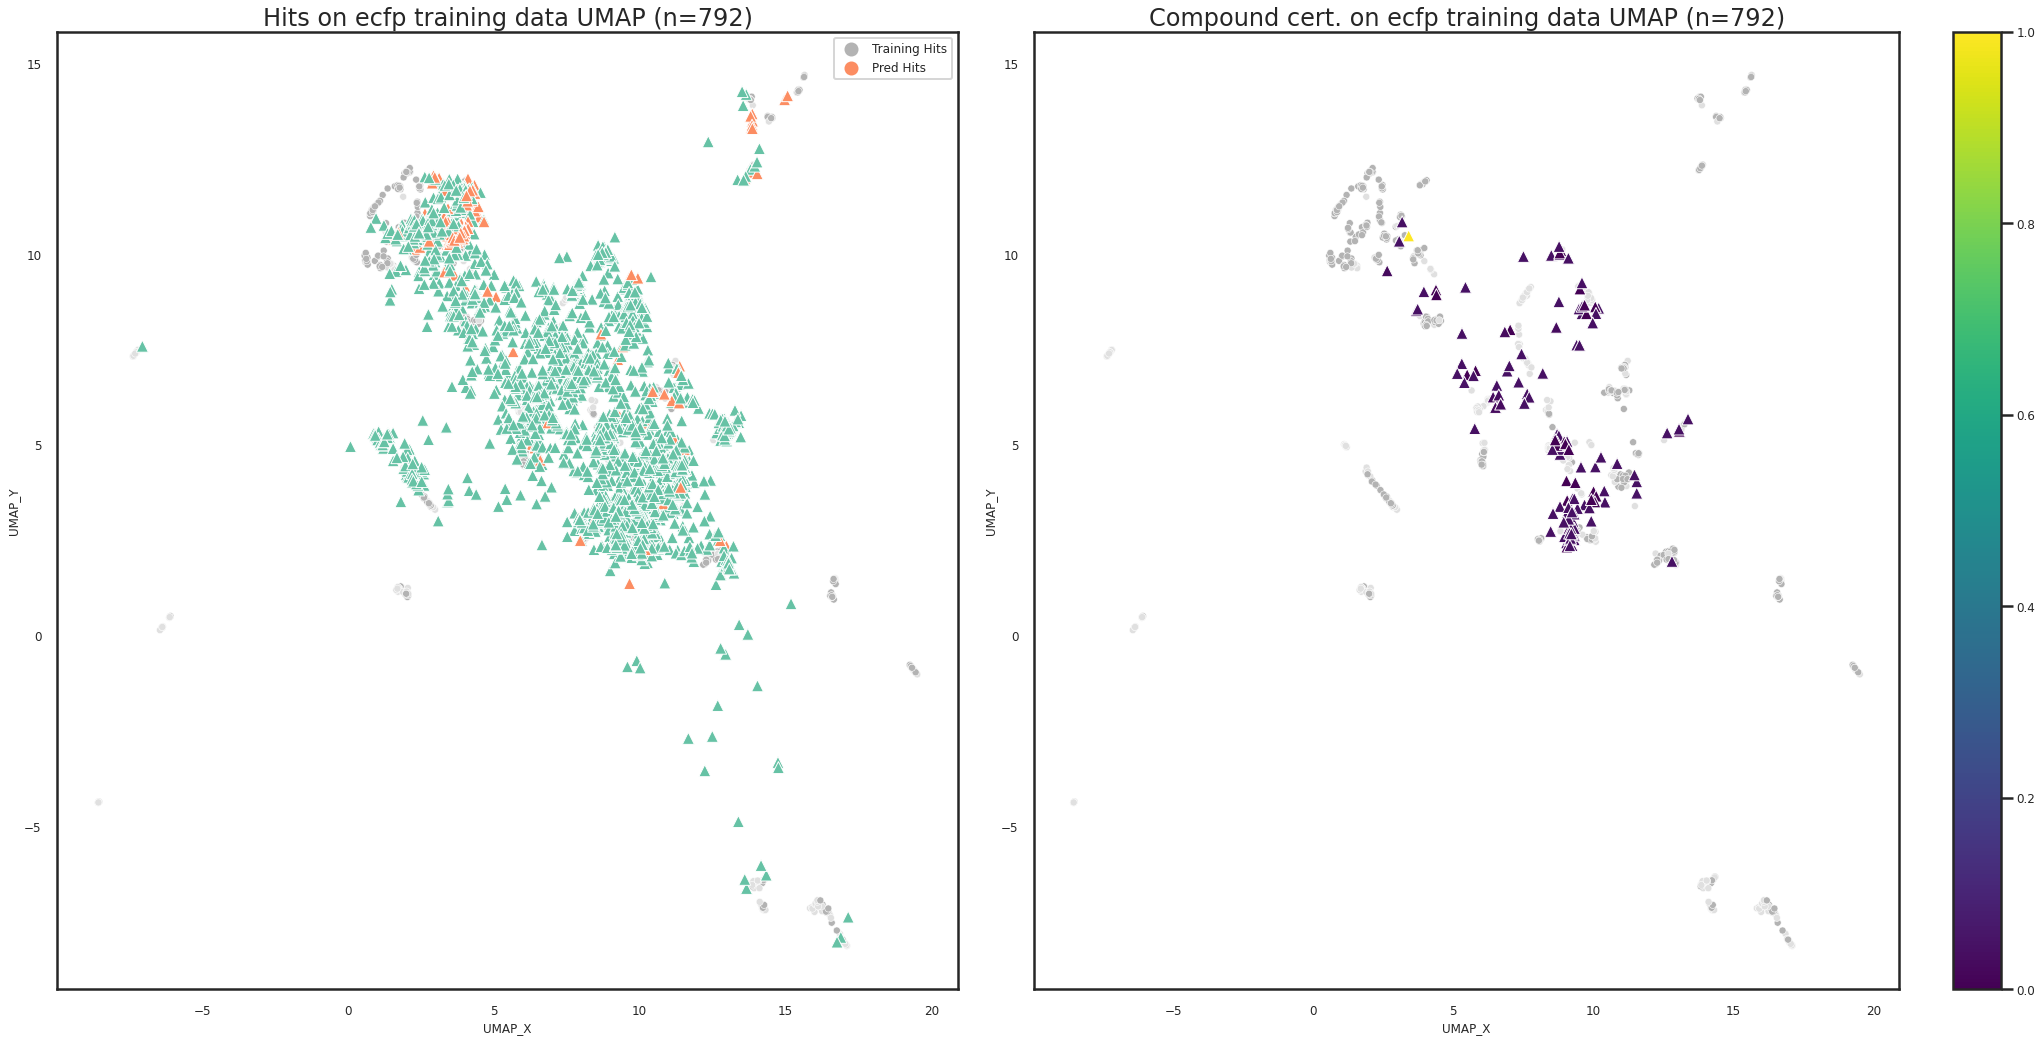

In [85]:
# plot
fig, ax = plt.subplots(1,2, figsize=(30,15), gridspec_kw={'width_ratios': [1, 1.2]})
# plot with active / inactive labels
sns.scatterplot(x=feats['UMAP_X'], y=feats["UMAP_Y"], s=50, hue=feats['active'].map({0:False, 1:True}), palette=['#e0e0e0','#b3b3b3'], ax=ax[0])
sns.scatterplot(x=featnew['UMAP_X'], y=featnew["UMAP_Y"], hue=featnew[f'active_pred'], palette='Set2', marker = '^', legend='full', ax=ax[0])
handles, _ = ax[0].get_legend_handles_labels()
ax[0].legend([handles[1],handles[-1]], [f'Training Hits', f'Pred Hits'], fontsize=12)
ax[0].set_title(f'Hits on {feat_type} training data UMAP (n={len(feats)})')
# plot with continuous labels
valcol=f'active_prob'
# reduce number of points to plot
plotnew = featnew[(featnew[valcol]<0.05) | (featnew[valcol]>0.8)] # highest and lowest values = more certain
norm = plt.Normalize(plotnew[valcol].min(), plotnew[valcol].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
sns.scatterplot(x=feats['UMAP_X'], y=feats["UMAP_Y"], s=50, hue=feats['active'], palette=['#e0e0e0','#b3b3b3'], ax=ax[1])
sns.scatterplot(x=plotnew['UMAP_X'], y=plotnew["UMAP_Y"], hue=plotnew[valcol], palette='viridis', marker = '^', ax=ax[1]);
# Remove the legend and add a colorbar
ax[1].get_legend().remove()
ax[1].figure.colorbar(sm)
ax[1].set_title(f'Compound cert. on {feat_type} training data UMAP (n={len(feats)})');
plt.tight_layout()